# Importing Libraries

In [4]:
import os
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model 
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import time
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPooling3D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import io
from PIL import Image
from warnings import filterwarnings
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Data Loading

In [5]:
X_train = []
y_train = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
channels=3
bstrain=2643
bstest=327
image_size = 256
for i in labels:
    folderPath = os.path.join('D:\Adithya pc\dip dataset 1\Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        #img=np.reshape(img,(1,256,256,3))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('D:\Adithya pc\dip dataset 1\Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        #img-np.reshape(img,(1,256,256,3))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 84.88it/s] 


In [6]:
img=cv2.imread('D:\Adithya pc\dip dataset 1\Training\meningioma_tumor\m (2).jpg')
print(img.shape)

(512, 512, 3)


In [7]:
print((X_train[1].shape))
print(len(X_test))

(256, 256, 3)


NameError: name 'X_test' is not defined

# Visualizatioin

**Glioma Tumor:** 
>Originating in the brain or spine's glial cells, gliomas represent 30% of all brain and central nervous system tumors. They are mostly malignant, with symptoms that vary depending on location, frequently resulting in seizures, cognitive impairments, or motor deficits.

**Meningioma Tumor:**
>Meningiomas, arising from the meninges enveloping the brain and spinal cord, are slow-growing tumors. While they typically are asymptomatic, they can cause seizures, cognitive decline, vision disturbances, or motor deficits depending on their location.

**Pituitary Tumor:**
>Pituitary adenomas, mostly benign, occur in the pituitary gland, accounting for 10-25% of intracranial neoplasms. They may cause hormonal imbalances, resulting in a variety of symptoms including headaches, vision changes, or hormonal dysfunctions.


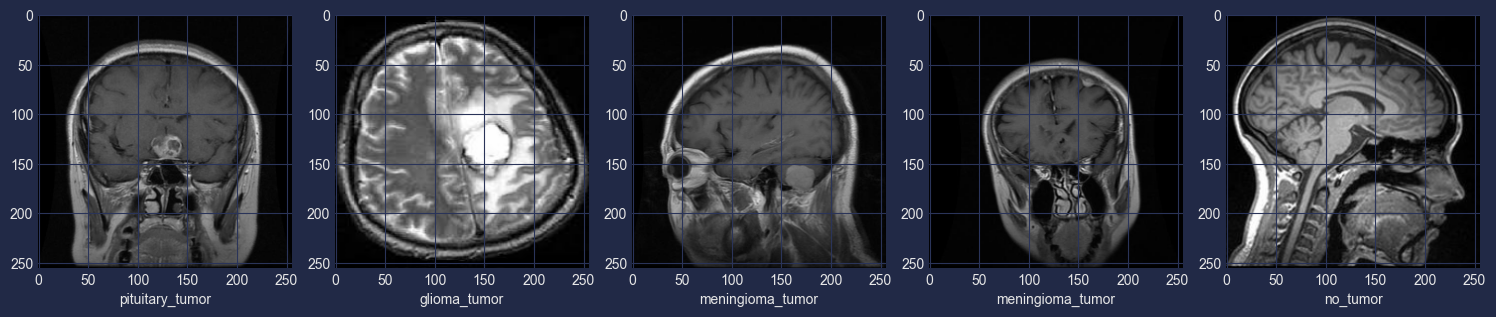

In [8]:
plt.figure(figsize=(15, 15))

random_indices = np.random.choice(len(X_train), size=5, replace=False) 
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[idx])
    plt.xlabel(y_train[idx])
    plt.tight_layout()
plt.show()

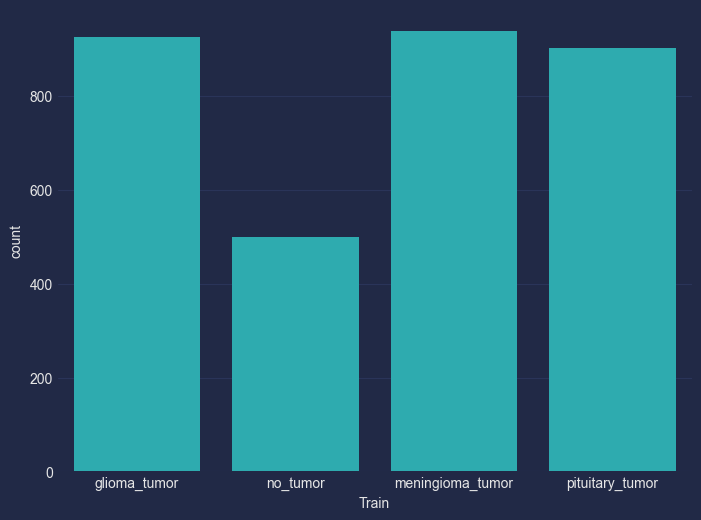

In [9]:
plt.figure(figsize = (18,6));
lis = ['Train']
for i,j in enumerate([y_train]):
    plt.subplot(1,2, i+1)
    sns.countplot(x = j)
    plt.xlabel(lis[i])


# Data augmentation

📌 **Data augmentation** is an important technique in deep learning for increasing and diversifying existing datasets. Instead of collecting new data, it involves transforming existing data to generate variations. This approach addresses the need for large and diverse datasets, which are required to train robust deep learning models. By augmenting the data, we can effectively increase dataset sizes and diversity, thereby improving the model's ability to generalize to different scenarios.

<p>&nbsp;</p>

*Source:[geeksforgeeks](https://www.geeksforgeeks.org/python-data-augmentation/)*

Overly extreme augmentation parameters can distort images, limiting the model's ability to generalize. For example, excessive rotation or zooming can obscure important image features, resulting in misclassifications.

In [10]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False, 
    fill_mode='nearest')

datagen.fit(X_train)

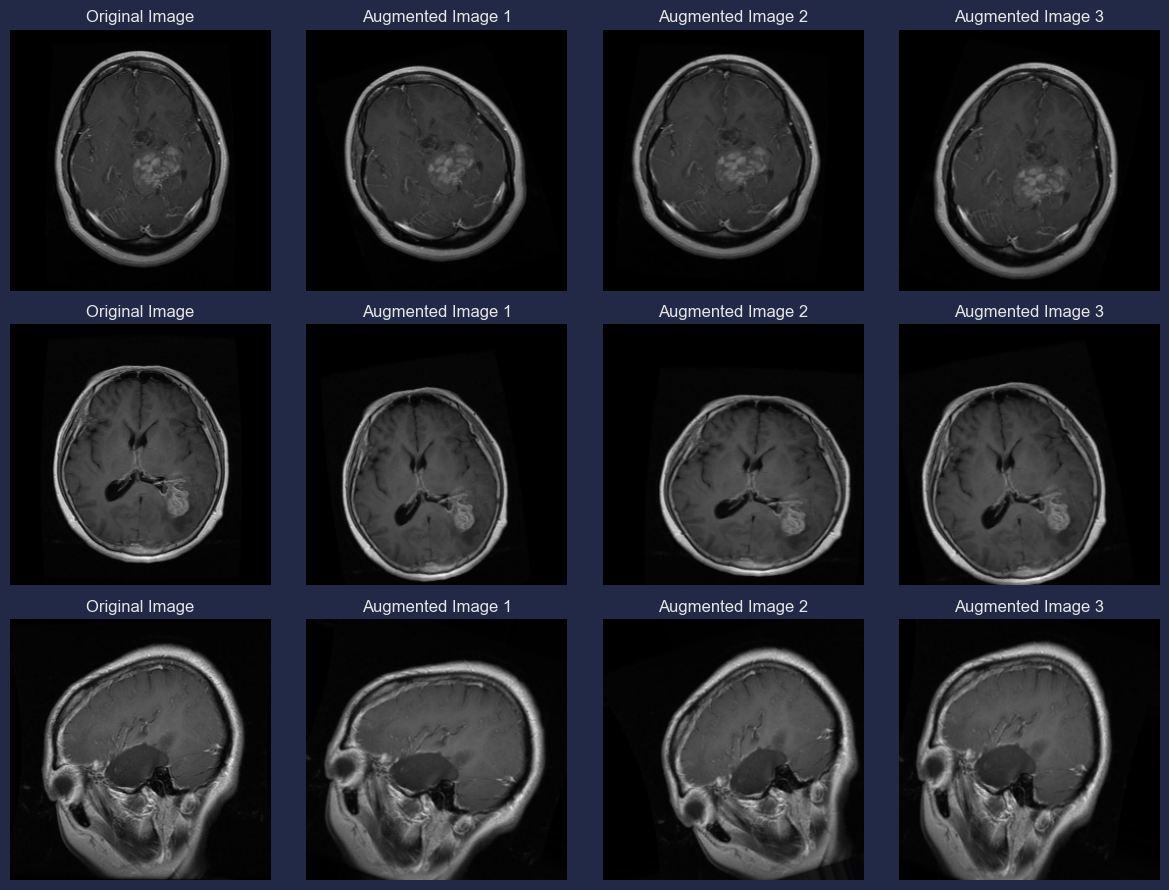

In [11]:
def visualize_augmented_images(image_generator, num_samples, num_augmented_images):
    augmented_images = []
    for sample in X_train[:num_samples]:
        
        # Create a list to store augmented versions of a sample
        augmented_samples = [sample]
        for _ in range(num_augmented_images):
            augmented_samples.append(image_generator.random_transform(sample))
        augmented_images.append(augmented_samples)

    # Plot original and augmented images
    fig, axes = plt.subplots(num_samples, num_augmented_images + 1, figsize=( 12, num_samples * 3))
    for i, sample in enumerate(augmented_images):
        for j, image in enumerate(sample):
            axes[i,j].imshow(image)
            if j == 0:
                axes[i, j].set_title('Original Image')
            else:
                axes[i,j].set_title(f'Augmented Image {j}')
            axes[i, j].axis('off')
            
    plt.tight_layout()
    plt.show()

#Visualize augmented images to see how it works
visualize_augmented_images(datagen, num_samples=3, num_augmented_images=3)

# Data Preperation

In [12]:
# Convert y_train labels to one-hot encoded format using pandas
y_train = np.array(pd.get_dummies(y_train))

In [13]:
#Split the dataset into training, testing and validation sets
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(f'X_train shape: {(X_train).shape}\n'
      f'y_train shape: {(y_train).shape}\n'
      f'X_train shape: {(X_test).shape}\n'
      f'y_train shape: {(y_test).shape}\n'
      f'y_train shape: {(X_valid).shape}\n'
      f'X_train shape: {(y_valid).shape}')

X_train shape: (2643, 256, 256, 3)
y_train shape: (2643, 4)
X_train shape: (327, 256, 256, 3)
y_train shape: (327, 4)
y_train shape: (294, 256, 256, 3)
X_train shape: (294, 4)


# Normalization

Scaling pixel values to the range [0, 1] is an important preprocessing step. It stabilizes training while improving model convergence and generalization. 

In [14]:
# Normalize pixel values of training images to the range [0,1]
X_train = X_train / 255
X_test = X_test / 255
X_valid = X_valid / 255

print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")

Maximum and Minimum pixel value after normalization: 1.0 - 0.0


# Model with Data Augmentation

In [12]:
# Define the model
model = Sequential()

# An Input layer specifying the input shape
model.add(Input(shape=(1,256, 256, 3)))

model.add(Conv2D(16, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling3D())
model.add(Dropout(0.2))

model.add(Conv2D(16, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling3D())
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling3D())
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling3D())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling3D())
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))   # the Softmax function works for multiclass classification problems 
                                            # and the Sigmoid function is a better option for binary-class problems.


model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

ValueError: Exception encountered when calling layer "max_pooling3d" (type MaxPooling3D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling3d/MaxPool3D}} = MaxPool3D[T=DT_FLOAT, data_format="NDHWC", ksize=[1, 2, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 2, 1]](Placeholder)' with input shapes: [?,1,256,256,16].

Call arguments received by layer "max_pooling3d" (type MaxPooling3D):
  • inputs=tf.Tensor(shape=(None, 1, 256, 256, 16), dtype=float32)

In [14]:
start_time = time.time()

history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_valid, y_valid),
                    epochs=20, verbose=1)

end_time = time.time()

runtime = end_time - start_time
print("Total runtime:", runtime, "seconds")

Epoch 1/20
42/42 [==============================] - 51s 1s/step - loss: 1.3556 - accuracy: 0.3269 - val_loss: 1.3390 - val_accuracy: 0.3741
Epoch 2/20
42/42 [==============================] - 49s 1s/step - loss: 1.2729 - accuracy: 0.4317 - val_loss: 1.2783 - val_accuracy: 0.4116
Epoch 3/20
42/42 [==============================] - 47s 1s/step - loss: 1.1992 - accuracy: 0.4552 - val_loss: 1.2483 - val_accuracy: 0.4082
Epoch 4/20
42/42 [==============================] - 46s 1s/step - loss: 1.1442 - accuracy: 0.4991 - val_loss: 1.3402 - val_accuracy: 0.3810
Epoch 5/20
42/42 [==============================] - 46s 1s/step - loss: 1.0868 - accuracy: 0.5305 - val_loss: 1.2432 - val_accuracy: 0.4592
Epoch 6/20
42/42 [==============================] - 47s 1s/step - loss: 1.0463 - accuracy: 0.5513 - val_loss: 1.3198 - val_accuracy: 0.4354
Epoch 7/20
42/42 [==============================] - 56s 1s/step - loss: 1.0023 - accuracy: 0.5793 - val_loss: 1.1891 - val_accuracy: 0.4558
Epoch 8/20
42/42 [==

# Confusion Matrix

I visualized the confusion matrix to gain insights, particularly in identifying areas where predictions are incorrect for both visible and unseen data. The confusion matrix is an effective tool because it provides a clear breakdown of the model's predictions across different classes and highlights areas where misclassification occurs.
<p>&nbsp;</p>

📚 In a confusion matrix, the **diagonal elements** represent **true positives**, or instances that were correctly classified for each class. **Off-diagonal elements** denote **misclassifications**, with each element (i, j) representing instances of class i predicted to be class j. As a result, the sum of values in each row (except the diagonal) indicates false negatives, whereas the sum in each column (excluding the diagonal) indicates false positives.

In [15]:
y_true = np.argmax(y_train, axis=1)
y_pred = np.argmax(model.predict(X_train), axis=1) 

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

83/83 [==============================] - 10s 120ms/step


KeyboardInterrupt: 

11/11 [==============================] - 1s 106ms/step


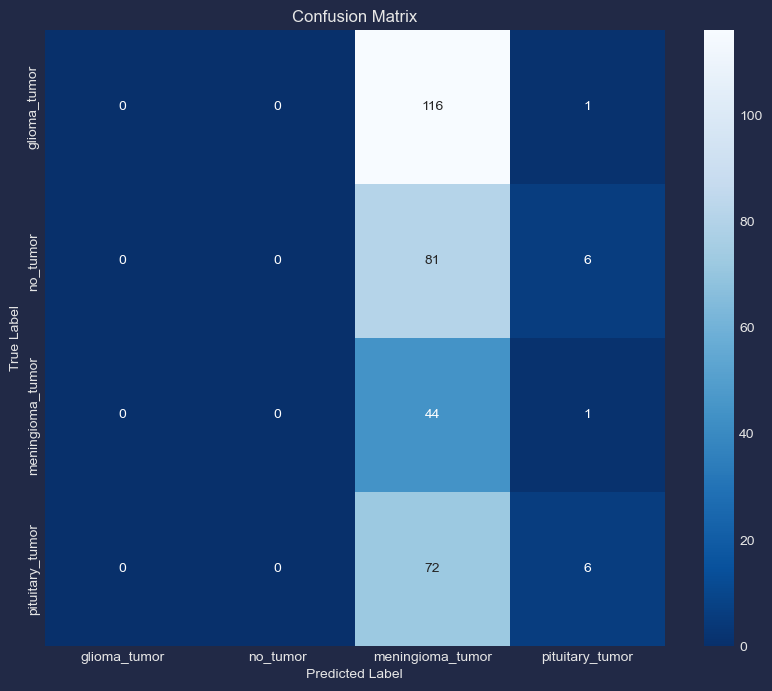

In [14]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Evaluation

**Here's an explanation of each metric in the classification report:**

<p>&nbsp;</p>

* **Precision**: Determines the accuracy of positive predictions by indicating how many of the predicted positive instances are actually positive.

* **Recall**: This metric measures the model's ability to correctly identify all relevant instances, indicating how many actual positive instances were correctly predicted.

* **F1-score**: Represents the harmonic mean of precision and recall, providing a balance between the two, which is especially useful when classes are imbalanced.

* **Support**: Indicates the number of actual occurrences of each class in the dataset, which provides context for calculating precision, recall, and F1 score.

* **Accuracy**: Indicates the overall correctness of the model's predictions by displaying the proportion of correctly predicted instances to the total number of instances.

* **Macro Avg**: Calculates the average precision, recall, and F1-score for all classes, treating each class equally regardless of class imbalance.

* **Weighted Avg**: Calculates the weighted average of precision, recall, and F1-score, with each class's score weighted by its support, providing a more accurate picture of overall model performance, particularly when classes are imbalanced.


In [17]:
# 0 - Glioma Tumor
# 1 - No Tumor
# 2 - Meningioma Tumor
# 3 - Pituitary Tumor
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.90      0.74       117
           1       0.50      0.03      0.06        87
           2       0.53      0.73      0.62        45
           3       0.69      0.83      0.76        78

    accuracy                           0.63       327
   macro avg       0.59      0.62      0.55       327
weighted avg       0.60      0.63      0.55       327



### Performance Summary with Data Augmentation:
<p>&nbsp;</p>

* **Accuracy:** Achieves an accuracy of approximately 70% on the validation set.
* **Runtime:** Total runtime is approximately 750 seconds for 20 epochs.

>Classes 0 (glioma tumor) and 3 (pituitary tumor) have high precision, recall, and F1-scores, indicating accurate predictions.
Class 1(no_tumor) has lower recall indicating difficulty identifying instances of this class.
Class 2 (meningioma_tumor) displays moderate precision , recall, and F1-score, indicating satisfactory performance.

# Model without Data Augmentation

In [15]:
# Define the model
model = Sequential()

# An Input layer specifying the input shape
model.add(Input(shape=(256, 256, 3)))

model.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Conv2D(32, kernel_size=(5,5), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.15))

    
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)        0

In [16]:
start_time = time.time()

history = model.fit(X_train,y_train,validation_split=0.1, epochs = 30, verbose=1, batch_size=64)

model.save('brainmodel_30.h5')

end_time = time.time()

runtime = end_time - start_time
print("Total runtime:", runtime, "seconds")

Epoch 1/30
38/38 [==============================] - 65s 2s/step - loss: 1.2707 - accuracy: 0.4188 - val_loss: 1.1624 - val_accuracy: 0.5245
Epoch 2/30
27/38 [====================>.........] - ETA: 17s - loss: 1.0232 - accuracy: 0.5747

KeyboardInterrupt: 

# Confusion Matrix

83/83 [==============================] - 19s 196ms/step


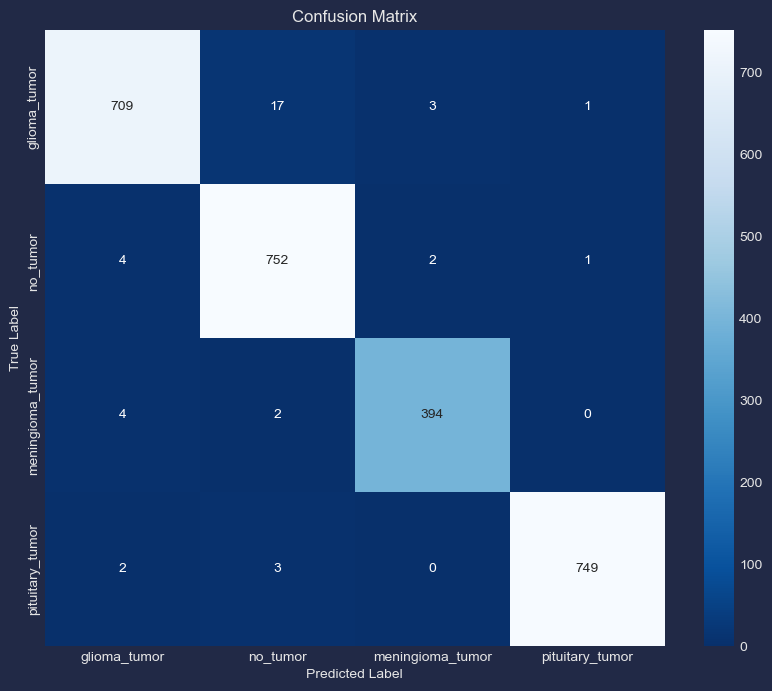

In [15]:
y_true = np.argmax(y_train, axis=1)
y_pred = np.argmax(model.predict(X_train), axis=1) 

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

11/11 [==============================] - 3s 194ms/step


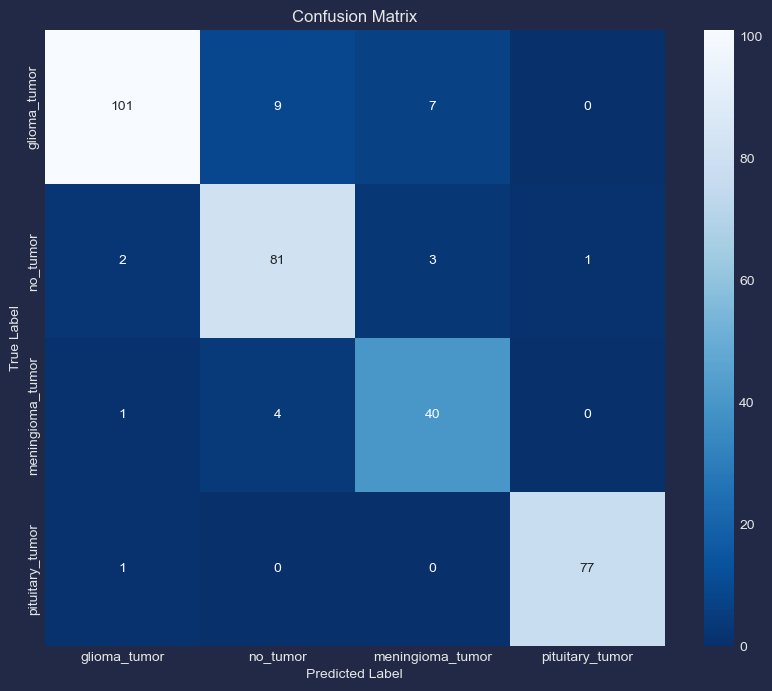

In [16]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1) 

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
new_model = tf.keras.models.load_model('brainmodel_30.h5')

#Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 32)       

# Evaluation

In [18]:
# 0 - Glioma Tumor
# 1 - No Tumor
# 2 - Meningioma Tumor
# 3 - Pituitary Tumor
print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       117
           1       0.86      0.93      0.90        87
           2       0.80      0.89      0.84        45
           3       0.99      0.99      0.99        78

    accuracy                           0.91       327
   macro avg       0.90      0.92      0.91       327
weighted avg       0.92      0.91      0.92       327



# Prediction

📌 Let's look at a random image and compare the actual vs. predicted label

In [24]:
random_index = np.random.randint(0, len(X_test))
predictions = new_model.predict(X_test[random_index:random_index+1])
print(X_test[random_index].shape)

# Interpret the model's predictions
predicted_class = np.argmax(predictions)  # Get the index of the class with the highest probability
predicted_label = labels[predicted_class] # Converting class to label
print(predicted_class)
actual_index = y_test[random_index] # Get the one-hot encoded actual class
actual_class = np.argmax(actual_index) # Get the index of the class
actual_label = labels[actual_class] # Converting class to label


print("Predicted label:", predicted_label, "\nActual label:", actual_label)

1/1 [==============================] - 0s 34ms/step
(256, 256, 3)
1
Predicted label: no_tumor 
Actual label: no_tumor


In [20]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [25]:
icam = GradCAM(new_model, predicted_class,'conv2d_4') 
image = X_test[random_index]  # Assuming random_index is the index of the image you want to visualize
heatmap = icam.compute_heatmap(image[np.newaxis, ...])
heatmap = cv2.resize(heatmap, (256, 256))
print(heatmap.shape, image.shape)


(heatmap, output) = icam.overlay_heatmap(heatmap, random_index, alpha=0.5)

(256, 256) (256, 256, 3)


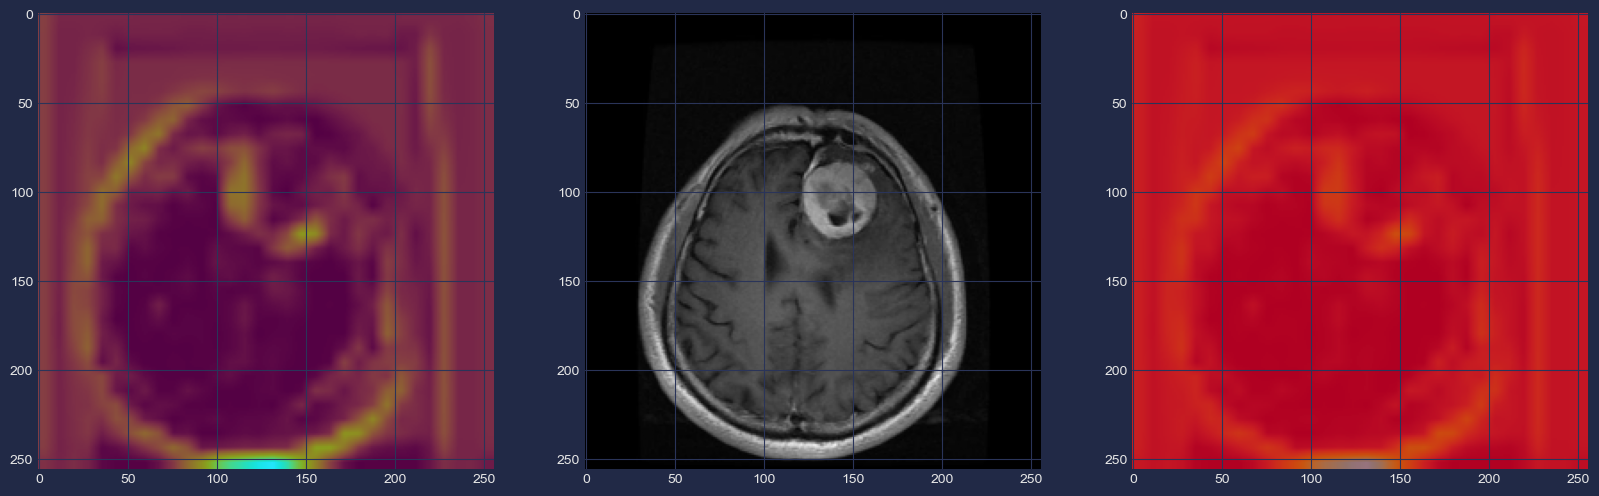

In [26]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(20,20)

ax[0].imshow(heatmap)
ax[1].imshow(image)
ax[2].imshow(output)